# Scattering Mie



## Enunciado del Problema

En un tejido biológico existen una gran variedad de estructuras (núcleos celuares células, fibras de colágeno, estructuras  lipídicas...) cuyos tamaños varían desde los nm hasta las  10 o 20 micras. 

<img src="figmie_1.png" style="max-width:100%" />

Dependiendo del tamño de las partículas de scattering $d$ comparado con la longitud de onda de la radiación incidente se pueden dar dos casos extremos de scattering:

* **Scattering Rayleigh**: si  $d \ll \lambda$.
* **Scattering Mie**: si $d  > \lambda$ 



<img src="figmie_2.png" style="max-width:100%" />

## Breve introduccion al scattering Mie

Vamos a representar el coeficiente de scattering Mie para el caso de una partícula de diámetro d= 50 micras, en función de la longitud de onda con los datos que se dan en el siguiente problema:

Supongamos que una onda colimada de longitud de onda $\lambda = 400$ nm se dirige a un medio formado por particulas esfericas de diametro $d = 579$ nm, e indice de refraccion $n_e = 1.57$, contenidas en agua
(densidad $\rho = 1$ g/cm$^3$)cuyo indice es 1.33. La densidad de la esfera es $\rho_s = 1.05$ g/cm$^3$. La concentracion de esferas en la disolucion es $C = 0.002$ en peso.


* (a) Razonar si se puede aplicar la teoria de Rayleigh en este caso, teniendo en cuenta las condiciones anteriormente comentadas.

* (b) En caso contrario, aplicar la teoria de Mie para obtener el coeficiente de scattering $\mu_s$, el factor de anisotropia $g$ y el coeficiente de scattering reducido en funcion de la longitud de
onda para el intervalor $[400, 1000]$ nm. Las expresiones necesarias para realizar el calculo se indican a continuacion.

$$\mu_s = \rho_s \sigma_s$$
$$\sigma_s = \pi r^2 Q_s$$
$$Q_s = \frac{2}{x^2}\sum_{l=1}^{\infty} (2 l +1)\left[|a_l|^2 + |b_l|^2 \right] $$
$$g = \frac{4}{Q_s x^2}\sum_{l=1}^{\infty} \left[\frac{l(l+2)}{l+1} Re\left(a_l a_{l+1}^* + b_l b_{l+1}^*\right) + \frac{2(l+2)}{l(l+1)}Re\left(a_lb_l^*\right)\right] $$

donde, 

$$a_l = \frac{\psi_l'(y) \psi_l(x) - n_r \psi_l(y) \psi_l'(x) }{\psi_l'(y) \zeta_l(x) - n_r \psi_l(y)\zeta_l'(x)}$$

$$b_l = \frac{n_r\psi_l'(y) \psi_l(x) -  \psi_l(y) \psi_l'(x) }{n_r\psi_l'(y) \zeta_l(x) - \psi_l(y)\zeta_l'(x)}$$


$$x = k r = \frac{2 \pi}{\lambda} n_m r$$

$$ y = n_r x \;\; ,, n_r = \frac{n_e}{n_m}$$

En estas ultimas expresiones, $\psi'$ y $\zeta'$ denotan las derivadas de $\psi$ y $\zeta$, mientras que estas se definen utilizando las funciones de Bessel de primera y segunda especie $J$ e $Y$ del siguiente modo,

$$\psi_l(z) = \sqrt{\frac{\pi z}{2}} J_{l+1/2}(z)$$
$$\chi_l(z) = \sqrt{\frac{\pi z}{2}} Y_{l+1/2}(z)$$
$$\zeta_l(z) = \psi_l(z) + i \chi_l(z)$$


Por otra parte, las derivadas de las funciones de Bessel se pueden calcular por medio de las siguientes expresiones, 

$$J_l'(z) = -\frac{l}{z} J_l(z) + J_{l-1}(z)$$
$$Y_l'(z) = -\frac{l}{z} Y_l(z) + Y_{l-1}(z)$$


Podemos realizar un script en Python para llevar a cabo los calculos



Text(0.5, 1.0, 'Coef. de scattering reducido')

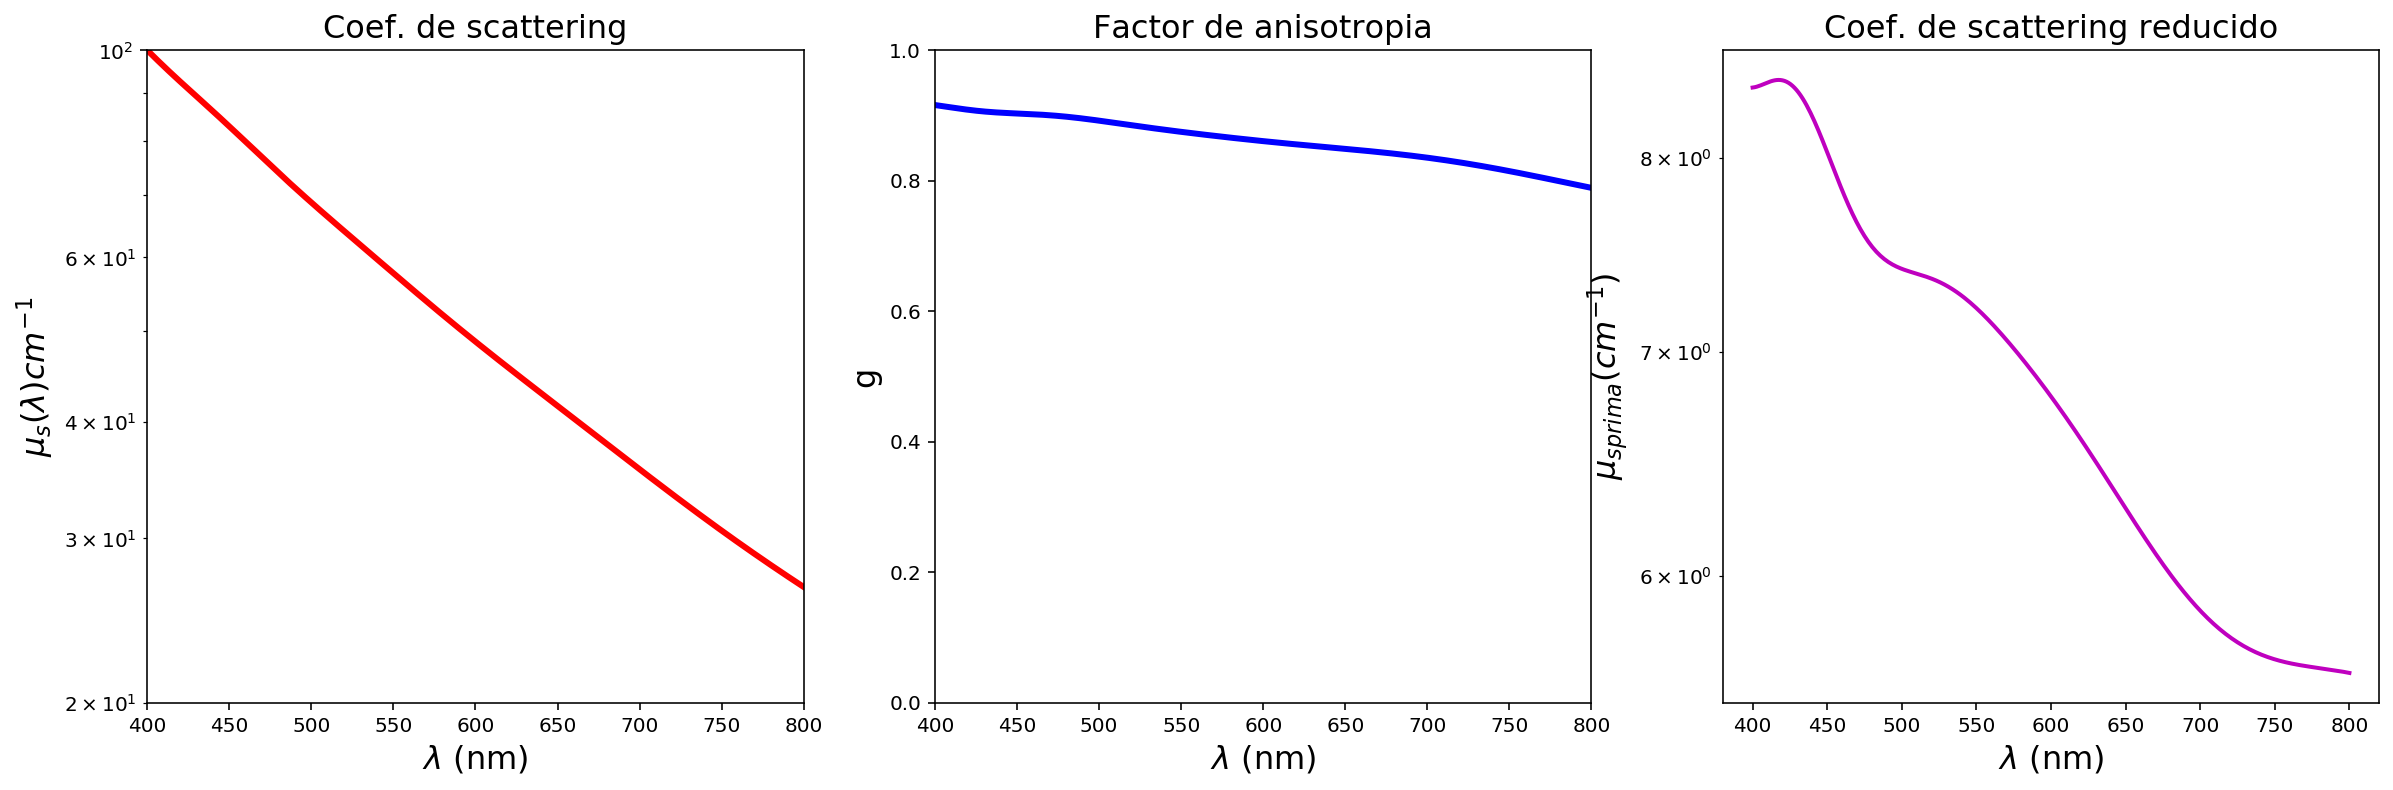

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv,yv,jvp,yvp


diametro=579e-9 #diámetro en m
a=diametro/2 #m
color='m'

n_s=1.57 #indice de la esfera
n_b=1.33 #indice del medio del entorno
n_rel= n_s/n_b
w_s= 1.05e3 # densidad de las particulas esfericas
w_b=1.00e3
C_peso=0.002  #concentracion en peso
landa1=400e-9
landa2=800e-9

LL=np.linspace(landa1,landa2,300)
mu_s=np.zeros(np.shape(LL))
gs = np.zeros(np.shape(LL))
mu_sprima=np.zeros(np.shape(LL))

for kk in range(len(LL)): 
    landa=LL[kk]  #m
    k=2*np.pi*n_b/landa
    x=k*a
    y=k*a*n_rel
    err=1e-8
    ndata=100000
    Qs=0  
    gQs=0
    for n in np.arange(1,ndata):
        #-------funciones de bessel---------------------
        Snx=np.sqrt(np.pi*x/2)*jv(n+0.5,x)
        Sny=np.sqrt(np.pi*y/2)*jv(n+0.5,y)
        Cnx=-np.sqrt(np.pi*x/2)*yv(n+0.5,x)
        Zetax= Snx+1.0j*Cnx
        #-------------------------------------------------------

        #-----Funciones derivadas
        Snxprima=-(n/x)*Snx+ np.sqrt(np.pi*x/2)*jv(n-0.5,x)
        Snyprima=-(n/y)*Sny+ np.sqrt(np.pi*y/2)*jv(n-0.5,y)
        Cnxprima=-n/x*Cnx -np.sqrt(np.pi*x/2)*yv(n-0.5,x)
        Zetaxprima= Snxprima+1.0j*Cnxprima
        #-----------------------------------------------------------

        #-------coeficientes de Mie---------------------------
        an_num= Snyprima*Snx- n_rel*Sny*Snxprima
        an_den= Snyprima*Zetax - n_rel*Sny*Zetaxprima
        an=an_num/an_den

        bn_num= n_rel*Snyprima*Snx- Sny*Snxprima
        bn_den= n_rel*Snyprima*Zetax - Sny*Zetaxprima
        bn=bn_num/bn_den
        #------------------------------------------------------------
        Qs1=(2*n+1)*(np.abs(an)**2+np.abs(bn)**2)
        Qs=Qs+Qs1

        if (n>1):
            gs1=(n-1)*(n+1)/(n)*np.real(an_1*np.conj(an) +bn_1*np.conj(bn))+ (2*n-1)/((n-1)*n)*np.real(an_1*np.conj(bn_1))
            gQs=gQs+gs1
 
        an_1=an
        bn_1=bn
        if (np.abs(Qs1)<(err*Qs)) and (np.abs(gs1)<err*gQs):
            break
        
     
    Qs=2/(x**2)*Qs
    gs[kk]=gQs*4/(Qs*x**2)   # coeficiente de anisotropía
    vol_s=4*np.pi/3*a**3
    rho_s=C_peso*w_b/(vol_s*w_s)  #densidad de esferas en la disolucion
    sigma_s=np.pi*a**2*Qs  #seccion eficaz de scattering
    mu_s[kk]=rho_s*sigma_s   #coeciente de scattering
    mu_sprima[kk]=mu_s[kk]*(1-gs[kk]) #coeficiente reducido de scattering

fig=plt.figure(figsize=(20,6))
fig.tight_layout()
plt.subplot(1,3,1)
plt.semilogy(LL*1e9,mu_s*1e-2,'r',linewidth=3)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('$\mu_s(\lambda) cm^{-1}$',fontsize=16)
plt.xlim(400,800)
plt.ylim(20,100)
plt.title('Coef. de scattering',fontsize=16)

plt.subplot(1,3,2)
plt.plot(LL*1e9,gs,'b',linewidth=3)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('g',fontsize=16)
plt.xlim(400,800)
plt.ylim(0,1)
plt.title('Factor de anisotropia',fontsize=16)

plt.subplot(1,3,3)
plt.semilogy(LL*1e9,mu_sprima*1e-2,color,linewidth=2)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('$\mu_{s prima} (cm^{-1})$',fontsize=16)
plt.title('Coef. de scattering reducido',fontsize=16);